In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [4]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [6]:
WC_players =r"C:\Users\admin\OneDrive\Desktop\Jupyter\WC_players.csv"
Batsman_Data = r"C:\Users\admin\OneDrive\Desktop\Jupyter\Batsman_Data.csv"
Bowler_Data = r"C:\Users\admin\OneDrive\Desktop\Jupyter\Bowler_data.csv"
Ground_Avg = r"C:\Users\admin\OneDrive\Desktop\Jupyter\Ground_Averages.csv"
Ground_Match_Result =r"C:\Users\admin\OneDrive\Desktop\Jupyter\ODI_Match_Results.csv"  
Ground_Match_Total = r"C:\Users\admin\OneDrive\Desktop\Jupyter\ODI_Match_Totals.csv"

In [7]:
df1 = pd.read_csv(Ground_Avg)
df2 = pd.read_csv(Ground_Match_Result)
df3 = pd.read_csv(Ground_Match_Total)

In [8]:
print(df1.head())
print("-----------------------------------------------------------------------------------")
print(df1.info())
print("-----------------------------------------------------------------------------------")
print(df1.shape)
print("-----------------------------------------------------------------------------------")

                                              Ground       Span  Mat  Won  \
0                      Eden Gardens, Kolkata - India  2013-2017    4    4   
1                    Feroz Shah Kotla, Delhi - India  2013-2019    4    4   
2               Melbourne Cricket Ground - Australia  2013-2019   15   15   
3  Saurashtra Cricket Association Stadium, Rajkot...  2013-2015    2    2   
4                          Adelaide Oval - Australia  2013-2019   10   10   

   Tied  NR  Runs  Wkts  Balls    Ave   RPO  
0     0   0  2161    72   2297  30.01  5.64  
1     0   0  1789    75   2331  23.85  4.60  
2     0   0  7656   217   8482  35.28  5.41  
3     0   0  1163    26   1200  44.73  5.81  
4     0   0  4863   157   5645  30.97  5.16  
-----------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  ----- 

In [9]:
print(df2.head())
print("-----------------------------------------------------------------------------------")
print(df2.info())
print("-----------------------------------------------------------------------------------")
print(df2.shape)
print("-----------------------------------------------------------------------------------")

   Unnamed: 0 Result    Margin  BR  Toss  Bat   Opposition     Ground  \
0         418    won   85 runs NaN  lost  1st      v India    Kolkata   
1         692   lost   85 runs NaN   won  2nd   v Pakistan    Kolkata   
2         419   lost   10 runs NaN  lost  2nd      v India      Delhi   
3         693    won   10 runs NaN   won  1st   v Pakistan      Delhi   
4         121   lost  107 runs NaN  lost  2nd  v Australia  Melbourne   

    Start Date    Match_ID   Country  Country_ID  
0   3 Jan 2013  ODI # 3315  Pakistan           7  
1   3 Jan 2013  ODI # 3315     India           6  
2   6 Jan 2013  ODI # 3316  Pakistan           7  
3   6 Jan 2013  ODI # 3316     India           6  
4  11 Jan 2013  ODI # 3317  SriLanka           8  
-----------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1322 entries, 0 to 1321
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      ------

In [10]:
print(df3.head())
print("-----------------------------------------------------------------------------------")
print(df3.info())
print("-----------------------------------------------------------------------------------")
print(df3.shape)
print("-----------------------------------------------------------------------------------")

   Unnamed: 0 Score  Overs   RPO  Target  Inns Result   Opposition     Ground  \
0         412   250   48.3  5.15     NaN     1    won      v India    Kolkata   
1         680   165   48.0  3.43   251.0     2   lost   v Pakistan    Kolkata   
2         413   157   48.5  3.21   168.0     2   lost      v India      Delhi   
3         681   167   43.4  3.82     NaN     1    won   v Pakistan      Delhi   
4         117   198   40.0  4.95   306.0     2   lost  v Australia  Melbourne   

    Start Date    Match_ID   Country  Country_ID  
0   3 Jan 2013  ODI # 3315  Pakistan           7  
1   3 Jan 2013  ODI # 3315     India           6  
2   6 Jan 2013  ODI # 3316  Pakistan           7  
3   6 Jan 2013  ODI # 3316     India           6  
4  11 Jan 2013  ODI # 3317  SriLanka           8  
-----------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 13 columns):
 #   Column     

In [11]:
common = set.intersection(set(df2['Start Date']), set(df3['Start Date']))
df = pd.concat([
    df2[df2['Start Date'].isin(common)],
    df3[df3['Start Date'].isin(common)]]).sort_values(by='Start Date')

In [12]:
df.head()

,Unnamed: 0,Result,Margin,BR,Toss,Bat,Opposition,Ground,Start Date,Match_ID,Country,Country_ID,Score,Overs,RPO,Target,Inns
891,235,won,70 runs,NaN,lost,1st,v Bangladesh,Colombo (SSC),1 Apr 2017,ODI # 3858,SriLanka,8,NaN,NaN,NaN,NaN,NaN
892,1056,lost,70 runs,NaN,won,2nd,v Sri Lanka,Colombo (SSC),1 Apr 2017,ODI # 3858,Bangladesh,25,NaN,NaN,NaN,NaN,NaN
870,1037,lost,NaN,NaN,NaN,NaN,v Sri Lanka,Colombo (SSC),1 Apr 2017,ODI # 3858,Bangladesh,25,210,44.3,4.71,281.0,2.0
869,230,won,NaN,NaN,NaN,NaN,v Bangladesh,Colombo (SSC),1 Apr 2017,ODI # 3858,SriLanka,8,280/9,50.0,5.60,NaN,1.0
148,712,won,9 wickets,115.0,won,2nd,v Zimbabwe,Bulawayo,1 Aug 2013,ODI # 3402,India,6,NaN,NaN,NaN,NaN,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2597 entries, 891 to 790
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2597 non-null   int64  
 1   Result      2597 non-null   object 
 2   Margin      1301 non-null   object 
 3   BR          606 non-null    float64
 4   Toss        1301 non-null   object 
 5   Bat         1301 non-null   object 
 6   Opposition  2597 non-null   object 
 7   Ground      2597 non-null   object 
 8   Start Date  2597 non-null   object 
 9   Match_ID    2597 non-null   object 
 10  Country     2597 non-null   object 
 11  Country_ID  2597 non-null   int64  
 12  Score       1296 non-null   object 
 13  Overs       1296 non-null   float64
 14  RPO         1296 non-null   object 
 15  Target      620 non-null    float64
 16  Inns        1296 non-null   float64
dtypes: float64(4), int64(2), object(11)
memory usage: 365.2+ KB


In [14]:
df.describe()

,Unnamed: 0,BR,Country_ID,Overs,Target,Inns
count,2597.000000,606.000000,2597.000000,1296.000000,620.000000,1296.000000
mean,655.441278,51.409241,8.565268,43.087423,253.440323,1.462963
std,377.894609,55.924337,10.343749,10.632343,70.004394,0.528875
min,1.000000,0.000000,1.000000,0.000000,68.000000,0.000000
25%,328.000000,10.000000,3.000000,40.200000,208.750000,1.000000
50%,656.000000,30.500000,5.000000,48.200000,258.000000,1.000000
75%,982.000000,75.000000,8.000000,50.000000,301.000000,2.000000
max,1322.000000,250.000000,40.000000,50.000000,482.000000,2.000000


In [15]:
df['Start Date']= pd.to_datetime(df['Start Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2597 entries, 891 to 790
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  2597 non-null   int64         
 1   Result      2597 non-null   object        
 2   Margin      1301 non-null   object        
 3   BR          606 non-null    float64       
 4   Toss        1301 non-null   object        
 5   Bat         1301 non-null   object        
 6   Opposition  2597 non-null   object        
 7   Ground      2597 non-null   object        
 8   Start Date  2597 non-null   datetime64[ns]
 9   Match_ID    2597 non-null   object        
 10  Country     2597 non-null   object        
 11  Country_ID  2597 non-null   int64         
 12  Score       1296 non-null   object        
 13  Overs       1296 non-null   float64       
 14  RPO         1296 non-null   object        
 15  Target      620 non-null    float64       
 16  Inns        1296 non-null   

In [16]:
df.head()

,Unnamed: 0,Result,Margin,BR,Toss,Bat,Opposition,Ground,Start Date,Match_ID,Country,Country_ID,Score,Overs,RPO,Target,Inns
891,235,won,70 runs,NaN,lost,1st,v Bangladesh,Colombo (SSC),2017-04-01,ODI # 3858,SriLanka,8,NaN,NaN,NaN,NaN,NaN
892,1056,lost,70 runs,NaN,won,2nd,v Sri Lanka,Colombo (SSC),2017-04-01,ODI # 3858,Bangladesh,25,NaN,NaN,NaN,NaN,NaN
870,1037,lost,NaN,NaN,NaN,NaN,v Sri Lanka,Colombo (SSC),2017-04-01,ODI # 3858,Bangladesh,25,210,44.3,4.71,281.0,2.0
869,230,won,NaN,NaN,NaN,NaN,v Bangladesh,Colombo (SSC),2017-04-01,ODI # 3858,SriLanka,8,280/9,50.0,5.60,NaN,1.0
148,712,won,9 wickets,115.0,won,2nd,v Zimbabwe,Bulawayo,2013-08-01,ODI # 3402,India,6,NaN,NaN,NaN,NaN,NaN


In [17]:
prob1_var = df[['Toss', 'Result', 'Ground']]
prob1_var.dropna()

,Toss,Result,Ground
891,lost,won,Colombo (SSC)
892,won,lost,Colombo (SSC)
148,won,won,Bulawayo
1135,won,lost,Dambulla
1136,lost,won,Dambulla
...,...,...,...
1202,lost,won,Abu Dhabi
792,won,lost,Dhaka
793,lost,won,Dhaka
791,won,lost,Port Elizabeth


In [18]:
prob1 = prob1_var.query('Ground == "The Oval"')
prob1.info

<bound method DataFrame.info of       Toss Result    Ground
915    won    won  The Oval
916   lost   lost  The Oval
894    NaN   lost  The Oval
893    NaN    won  The Oval
91    lost   lost  The Oval
...    ...    ...       ...
929    won    won  The Oval
1302  lost    n/r  The Oval
1279   NaN    n/r  The Oval
1278   NaN    n/r  The Oval
1303   won    n/r  The Oval

[68 rows x 3 columns]>

In [19]:
tempvar = prob1.loc[prob1['Result']=='won']
tvar = tempvar['Toss'].value_counts()
tvar

Toss
won     10
lost     5
Name: count, dtype: int64

In [20]:
df.head()

,Unnamed: 0,Result,Margin,BR,Toss,Bat,Opposition,Ground,Start Date,Match_ID,Country,Country_ID,Score,Overs,RPO,Target,Inns
891,235,won,70 runs,NaN,lost,1st,v Bangladesh,Colombo (SSC),2017-04-01,ODI # 3858,SriLanka,8,NaN,NaN,NaN,NaN,NaN
892,1056,lost,70 runs,NaN,won,2nd,v Sri Lanka,Colombo (SSC),2017-04-01,ODI # 3858,Bangladesh,25,NaN,NaN,NaN,NaN,NaN
870,1037,lost,NaN,NaN,NaN,NaN,v Sri Lanka,Colombo (SSC),2017-04-01,ODI # 3858,Bangladesh,25,210,44.3,4.71,281.0,2.0
869,230,won,NaN,NaN,NaN,NaN,v Bangladesh,Colombo (SSC),2017-04-01,ODI # 3858,SriLanka,8,280/9,50.0,5.60,NaN,1.0
148,712,won,9 wickets,115.0,won,2nd,v Zimbabwe,Bulawayo,2013-08-01,ODI # 3402,India,6,NaN,NaN,NaN,NaN,NaN


In [21]:
prob2 = df[['Bat', 'Ground', 'Opposition', 'Result']]
prob2.head()

,Bat,Ground,Opposition,Result
891,1st,Colombo (SSC),v Bangladesh,won
892,2nd,Colombo (SSC),v Sri Lanka,lost
870,NaN,Colombo (SSC),v Sri Lanka,lost
869,NaN,Colombo (SSC),v Bangladesh,won
148,2nd,Bulawayo,v Zimbabwe,won


In [22]:
prob2.dropna()
#Grouping According to one ground
prob2 = prob2.query('Ground == "Birmingham"')
prob2

,Bat,Ground,Opposition,Result
90,2nd,Birmingham,v South Africa,lost
88,NaN,Birmingham,v Pakistan,won
89,NaN,Birmingham,v South Africa,lost
89,1st,Birmingham,v Pakistan,won
935,2nd,Birmingham,v Australia,won
936,1st,Birmingham,v England,lost
914,NaN,Birmingham,v England,lost
913,NaN,Birmingham,v Australia,won
156,NaN,Birmingham,v Australia,n/r
157,NaN,Birmingham,v England,n/r


In [23]:
prob2_b1 = prob2.loc[prob2['Bat']=='1st']
prob2_b1['Result'].value_counts()

Result
lost    7
won     5
n/r     3
Name: count, dtype: int64

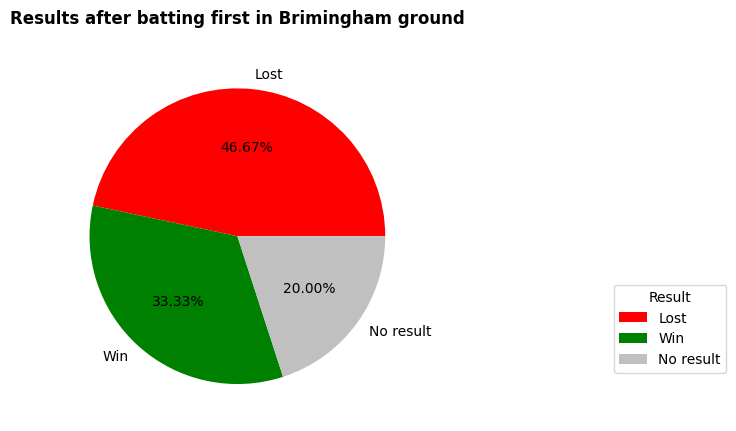

In [27]:
fig = figsize =(20, 10)
label = ['Lost', 'Win', 'No result']
colors = ['red', 'green', 'silver']
plt.pie(prob2_b1['Result'].value_counts(), autopct='%1.2f%%', labels=label, textprops = dict(color ="black"), colors=colors)
plt.title('Results after batting first in Brimingham ground', size = 12, weight ="bold", pad=20)
plt.legend(title ="Result", loc ="center left", bbox_to_anchor =(1.5, 0, 0.5, 0.5)) 

In [28]:
prob2_b2 = prob2.loc[prob2['Bat']=='2nd']
#Counting how many of these second batters have won and lost
prob2_b2['Result'].value_counts()

Result
won     7
lost    5
n/r     3
Name: count, dtype: int64

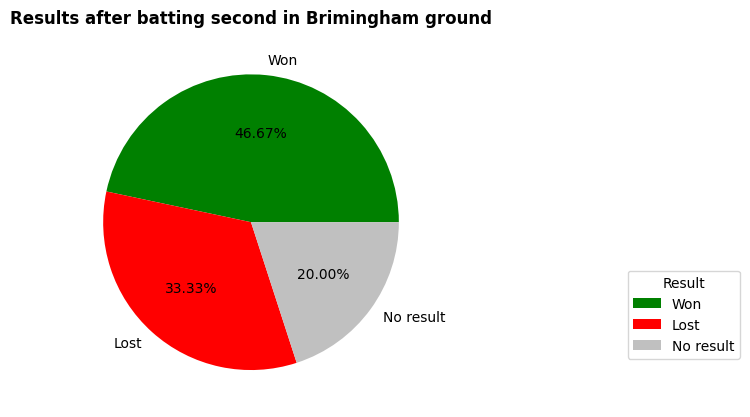

In [38]:
fig = figsize =(20, 10)
label = ['Won', 'Lost', 'No result']
colors = ['green', 'red', 'silver']
plt.pie(prob2_b1['Result'].value_counts(), autopct='%1.2f%%', labels=label, textprops = dict(color ="black"), colors=colors)
plt.title('Results after batting second in Brimingham ground', size = 12, weight ="bold", pad=10)
plt.legend(title ="Result", loc ="center left", bbox_to_anchor =(1.5, 0, 0.5, 0.5))

In [39]:
prob3 = df[['Target', 'Result', 'Ground']]
#Dropping null values
prob3 = prob3.dropna()
prob3

,Target,Result,Ground
870,281.0,lost,Colombo (SSC)
147,145.0,won,Bulawayo
1113,245.0,won,Dambulla
400,129.0,won,Dhaka
31,71.0,won,Perth
...,...,...,...
375,243.0,won,Hyderabad (Deccan)
1179,210.0,won,Abu Dhabi
1177,232.0,lost,Adelaide
770,168.0,won,Port Elizabeth


In [43]:
prob3g = prob3.query('Ground == "The Oval"')
#Grouping according to winners at Oval
prob3g = prob3g.loc[prob3g['Result']=='won']
#Mean score of the wiining team
mean_score = prob3g['Target'].mean()
prob3g

,Target,Result,Ground
893,306.0,won,The Oval
91,234.0,won,The Oval
916,192.0,won,The Oval
94,294.0,won,The Oval
1083,215.0,won,The Oval
105,176.0,won,The Oval
967,253.0,won,The Oval
718,308.0,won,The Oval
82,171.0,won,The Oval
907,322.0,won,The Oval


In [42]:
mean_score

247.1

In [44]:
print("The Average Score for this ground is: ")
print(prob3['Target'].mean())
print("The Highest Score for this ground is: ")
print(prob3g['Target'].max())
print("The Lowest Score for this ground is: ")
print(prob3['Target'].min())

The Average Score for this ground is: 
253.44032258064516
The Highest Score for this ground is: 
322.0
The Lowest Score for this ground is: 
68.0


In [45]:
prob5 = df.query('Country == "India"')
prob5 = prob5.query('Opposition == "v England"')
prob5.head()

,Unnamed: 0,Result,Margin,BR,Toss,Bat,Opposition,Ground,Start Date,Match_ID,Country,Country_ID,Score,Overs,RPO,Target,Inns
6,694,lost,9 runs,NaN,lost,2nd,v England,Rajkot,2013-01-11,ODI # 3318,India,6,NaN,NaN,NaN,NaN,NaN
6,682,lost,NaN,NaN,NaN,NaN,v England,Rajkot,2013-01-11,ODI # 3318,India,6,316/9,50.0,6.32,326.0,2.0
1116,825,won,8 wickets,59.0,won,2nd,v England,Nottingham,2018-07-12,ODI # 4014,India,6,NaN,NaN,NaN,NaN,NaN
1093,809,won,NaN,NaN,NaN,NaN,v England,Nottingham,2018-07-12,ODI # 4014,India,6,269/2,40.1,6.69,269.0,2.0
1096,810,lost,NaN,NaN,NaN,NaN,v England,Lord's,2018-07-14,ODI # 4016,India,6,236,50.0,4.72,323.0,2.0


In [46]:
prob5 = df.query('Country == "England"')
prob5 = prob5.query('Opposition == "v India"')
prob5.head()

,Unnamed: 0,Result,Margin,BR,Toss,Bat,Opposition,Ground,Start Date,Match_ID,Country,Country_ID,Score,Overs,RPO,Target,Inns
7,836,won,NaN,NaN,NaN,NaN,v India,Rajkot,2013-01-11,ODI # 3318,England,1,325/4,50.0,6.50,NaN,1.0
7,852,won,9 runs,NaN,won,1st,v India,Rajkot,2013-01-11,ODI # 3318,England,1,NaN,NaN,NaN,NaN,NaN
1117,980,lost,8 wickets,59.0,lost,1st,v India,Nottingham,2018-07-12,ODI # 4014,England,1,NaN,NaN,NaN,NaN,NaN
1094,962,lost,NaN,NaN,NaN,NaN,v India,Nottingham,2018-07-12,ODI # 4014,England,1,268,49.5,5.37,NaN,1.0
1120,981,won,86 runs,NaN,won,1st,v India,Lord's,2018-07-14,ODI # 4016,England,1,NaN,NaN,NaN,NaN,NaN


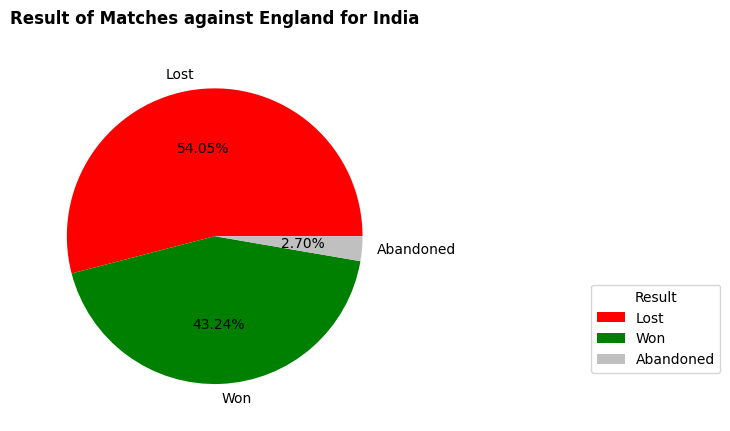

In [48]:
fig = figsize =(30, 20)
label = ['Lost', 'Won', 'Abandoned']
colors = ['red', 'Green', 'Silver']
plt.pie(prob5['Result'].value_counts(), labels=label, colors=colors,  autopct='%1.2f%%')
plt.title('Result of Matches against England for India', size = 12, weight ="bold", pad=20)
plt.legend(title ="Result", loc ="center left", bbox_to_anchor =(1.5, 0, 0.5, 0.5))